In [1]:

%load_ext autoreload
%autoreload 1


In [1]:
from setup_cc import *
from sklearn.preprocessing import StandardScaler
from hembedder.utils.hyperparameter_tuning_legacy import grid_search, random_search
from hembedder.utils import hyperparameter_tuning
from hembedder.utils import quality_metrics
import umap


ascending = [False]*14

evaluate_n_n_default = quality_metrics.CDEmbeddingPerformance(dcor_level=2, n_neighbours=15, metric='manhattan')
evaluate = quality_metrics.CDEmbeddingPerformance(dcor_level=1,metric='manhattan')
from sklearn.preprocessing import StandardScaler

evaluators = {'Random_triplets' : evaluate.random_triplet_eval,
            'dcor_1': evaluate._return_distance_correlation,
            'neighbor_kept_50' : evaluate.neighbor_kept_ratio_eval,
            'neighbor_kept' : evaluate_n_n_default.neighbor_kept_ratio_eval,
            'dcor_2': evaluate_n_n_default._return_distance_correlation,
            'Trustworthiness': evaluate._return_trustworthiness,
            'LCMC_Q_matrix': evaluate._return_LCMC,
            'Trustworthiness_Q_matrix': evaluate._return_Qtrustworthiness,
            'Continuit_Q_matrix':  evaluate._return_Qcontinuity,
            'nMRRE_Q_matrix' : evaluate._return_nMRRE,
            'vMRRE_Q_matrix' : evaluate._return_vMRRE,
            'Qnx_crm_Q_matrix': evaluate._return_qnx_crm,
            'Rnx_crm_Q_matrix': evaluate._return_rnx_crm,
            'Qnx_auc_crm_Q_matrix': evaluate._return_rnx_auc_crm}

sizes = [5000,10000,20000,40000,60000,80000,160000]
metric_chuck_size = 1000
default_sample_size = 40000
default_component = 8
default_scaler = StandardScaler()
umap_extra_args = {'metric':'manhattan',
                   'output_metric': 'manhattan',
                   'n_jobs':4,
                   'n_epochs':500,
                   'init': 'spectral',
                   'dens_lambda': 0.1,
                   'dens_frac': 0.1,
                   'repulsion_strength': 1.1,
                   'negative_sample_rate':10,
                   'random_state': 42,
                   'min_dist':0.0}


## Individually tuning the parameters for nearest neighbours for different sample size

In [9]:
#n_n 5
evaluate_n_n_default.n_neighbours = 5
evaluators["neighbor_kept"] = evaluate_n_n_default.neighbor_kept_ratio_eval
evaluate_n_n_default.n_neighbours = 5                   
param_grid = {'n_neighbors': [5]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_5_std_Q_mh.csv",
                        sample_size=sizes,metric_chuck_size=metric_chuck_size,scaler=default_scaler, num_iter=10, dtype=np.float32,
                        n_parjobs=10,n_components=default_component, **umap_extra_args)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_5_std_Q_mh.csv")

Total number of embedding runs :  7 (combos)x10(iterations) with [5000, 10000, 20000, 40000, 60000, 80000, 160000] sample_size for the embedding. Exceptions will be raised, if sample size is larger than data size which is 3093792


7it [4:42:26, 2420.96s/it]                       

Hyperpameter tuning is done and the best scores with 160000 sample size are
Random_triplets              0.74402
dcor_1                      0.842613
neighbor_kept_50             0.32048
neighbor_kept                0.14686
dcor_2                      0.696106
Trustworthiness             0.883347
LCMC_Q_matrix               0.395696
Trustworthiness_Q_matrix    0.907094
Continuit_Q_matrix          0.880993
nMRRE_Q_matrix              0.085594
vMRRE_Q_matrix              0.103311
Qnx_crm_Q_matrix            0.395696
Rnx_crm_Q_matrix            0.363823
Qnx_auc_crm_Q_matrix        0.315484
Name: 0, dtype: object
with parameter: {'n_neighbors': 5, 'n_components': 8, 'metric': 'manhattan', 'output_metric': 'manhattan', 'n_jobs': 4, 'n_epochs': 500, 'init': 'spectral', 'dens_lambda': 0.1, 'dens_frac': 0.1, 'repulsion_strength': 1.1, 'negative_sample_rate': 10, 'min_dist': 0.0}
Finish tuning in  282.45 minutes.


In [20]:
#n_n 15
evaluate_n_n_default.n_neighbours = 15 
evaluators["neighbor_kept"] = evaluate_n_n_default.neighbor_kept_ratio_eval
param_grid = {'n_neighbors': [15]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_15_std_Q_mh.csv",
                        sample_size=sizes,metric_chuck_size=metric_chuck_size,scaler=default_scaler, num_iter=10, dtype=np.float32,
                        n_parjobs=10,n_components=default_component,**umap_extra_args)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_15_std_Q_mh.csv")

Total number of embedding runs :  7 (combos)x10(iterations) with [5000, 10000, 20000, 40000, 60000, 80000, 160000] sample_size for the embedding. Exceptions will be raised, if sample size is larger than data size which is 3093792


7it [8:53:33, 4573.38s/it]                         

Hyperpameter tuning is done and the best scores with 80000 sample size are
Random_triplets               0.7445
dcor_1                      0.832779
neighbor_kept_50             0.32622
neighbor_kept               0.224907
dcor_2                      0.683415
Trustworthiness             0.891602
LCMC_Q_matrix               0.419493
Trustworthiness_Q_matrix    0.918176
Continuit_Q_matrix          0.889927
nMRRE_Q_matrix              0.072473
vMRRE_Q_matrix              0.092747
Qnx_crm_Q_matrix            0.419493
Rnx_crm_Q_matrix            0.388876
Qnx_auc_crm_Q_matrix        0.337314
Name: 0, dtype: object
with parameter: {'n_neighbors': 15, 'n_components': 8, 'metric': 'manhattan', 'output_metric': 'manhattan', 'n_jobs': 4, 'n_epochs': 500, 'init': 'spectral', 'dens_lambda': 0.1, 'dens_frac': 0.1, 'repulsion_strength': 1.1, 'negative_sample_rate': 10, 'min_dist': 0.0}
Finish tuning in  533.56 minutes.


In [2]:
#n_n 30
evaluate_n_n_default.n_neighbours = 30
evaluators["neighbor_kept"] = evaluate_n_n_default.neighbor_kept_ratio_eval
param_grid = {'n_neighbors': [30]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_size_large_n_n_30_std_Q_mh.csv",
                        sample_size=sizes,metric_chuck_size=metric_chuck_size,scaler=default_scaler, num_iter=10, dtype=np.float32,
                        n_parjobs=10,n_components=default_component,**umap_extra_args)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_size_large_n_n_30_std_Q_mh.csv")

Total number of embedding runs :  7 (combos)x10(iterations) with [5000, 10000, 20000, 40000, 60000, 80000, 160000] sample_size for the embedding. Exceptions will be raised, if sample size is larger than data size which is 3093792


7it [10:29:19, 5394.24s/it]                        

Hyperpameter tuning is done and the best scores with 160000 sample size are
Random_triplets              0.74572
dcor_1                      0.851801
neighbor_kept_50             0.32996
neighbor_kept                 0.2827
dcor_2                      0.689422
Trustworthiness             0.896296
LCMC_Q_matrix               0.427972
Trustworthiness_Q_matrix    0.922487
Continuit_Q_matrix          0.893885
nMRRE_Q_matrix              0.068713
vMRRE_Q_matrix              0.089588
Qnx_crm_Q_matrix            0.427972
Rnx_crm_Q_matrix            0.397802
Qnx_auc_crm_Q_matrix        0.341536
Name: 0, dtype: object
with parameter: {'n_neighbors': 30, 'n_components': 8, 'metric': 'manhattan', 'output_metric': 'manhattan', 'n_jobs': 4, 'n_epochs': 500, 'init': 'spectral', 'dens_lambda': 0.1, 'dens_frac': 0.1, 'repulsion_strength': 1.1, 'negative_sample_rate': 10, 'min_dist': 0.0}
Finish tuning in  629.33 minutes.


In [3]:
#n_n 50
evaluate_n_n_default.n_neighbours = 50
evaluators["neighbor_kept"] = evaluate_n_n_default.neighbor_kept_ratio_eval
param_grid = {'n_neighbors': [50]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_size_large_n_n_50_std_Q_mh.csv",
                        sample_size=sizes,metric_chuck_size=metric_chuck_size,scaler=default_scaler, num_iter=10, dtype=np.float32,
                        n_parjobs=10,n_components=default_component,**umap_extra_args)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_size_large_n_n_50_std_Q_mh.csv")

Total number of embedding runs :  7 (combos)x10(iterations) with [5000, 10000, 20000, 40000, 60000, 80000, 160000] sample_size for the embedding. Exceptions will be raised, if sample size is larger than data size which is 3093792


7it [12:37:03, 6489.03s/it]                        

Hyperpameter tuning is done and the best scores with 60000 sample size are
Random_triplets              0.74554
dcor_1                      0.851653
neighbor_kept_50            0.326806
neighbor_kept               0.326806
dcor_2                      0.686992
Trustworthiness             0.894693
LCMC_Q_matrix               0.424997
Trustworthiness_Q_matrix    0.923267
Continuit_Q_matrix          0.893473
nMRRE_Q_matrix              0.067743
vMRRE_Q_matrix              0.090038
Qnx_crm_Q_matrix            0.424997
Rnx_crm_Q_matrix             0.39467
Qnx_auc_crm_Q_matrix        0.344914
Name: 0, dtype: object
with parameter: {'n_neighbors': 50, 'n_components': 8, 'metric': 'manhattan', 'output_metric': 'manhattan', 'n_jobs': 4, 'n_epochs': 500, 'init': 'spectral', 'dens_lambda': 0.1, 'dens_frac': 0.1, 'repulsion_strength': 1.1, 'negative_sample_rate': 10, 'min_dist': 0.0}
Finish tuning in  757.05 minutes.


In [5]:
#n_n 100
evaluate_n_n_default.n_neighbours = 100
evaluators["neighbor_kept"] = evaluate_n_n_default.neighbor_kept_ratio_eval
param_grid = {'n_neighbors': [100]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_size_large_n_n_100_std_Q_mh.csv",
                        sample_size=sizes,metric_chuck_size=metric_chuck_size,scaler=default_scaler, num_iter=10, dtype=np.float32,
                        n_parjobs=10,n_components=default_component,**umap_extra_args)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_100_std_Q_mh.csv")

Total number of embedding runs :  7 (combos)x10(iterations) with [5000, 10000, 20000, 40000, 60000, 80000, 160000] sample_size for the embedding. Exceptions will be raised, if sample size is larger than data size which is 3093792


7it [15:23:07, 7912.50s/it]                        

Hyperpameter tuning is done and the best scores with 80000 sample size are
Random_triplets              0.74586
dcor_1                      0.853333
neighbor_kept_50            0.329986
neighbor_kept               0.415984
dcor_2                      0.696472
Trustworthiness              0.89566
LCMC_Q_matrix               0.428665
Trustworthiness_Q_matrix    0.923479
Continuit_Q_matrix          0.893473
nMRRE_Q_matrix              0.067353
vMRRE_Q_matrix              0.089391
Qnx_crm_Q_matrix            0.428665
Rnx_crm_Q_matrix            0.398531
Qnx_auc_crm_Q_matrix        0.344285
Name: 0, dtype: object
with parameter: {'n_neighbors': 100, 'n_components': 8, 'metric': 'manhattan', 'output_metric': 'manhattan', 'n_jobs': 4, 'n_epochs': 500, 'init': 'spectral', 'dens_lambda': 0.1, 'dens_frac': 0.1, 'repulsion_strength': 1.1, 'negative_sample_rate': 10, 'min_dist': 0.0}
Finish tuning in  923.13 minutes.


In [5]:
#standard scaler
from sklearn.preprocessing import StandardScaler

param_grid = {'n_neighbors': [5,15,30,50,100]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_std_scale_mh.csv",
                        sample_size=sizes,metric_chuck_size=metric_chuck_size,scaler=StandardScaler(), num_iter=10, dtype=np.float32,
                        n_parjobs=10, **umap_extra_args)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_std_scale_mh.csv")

Total number of embedding runs :  5 (combos)x10(iterations) with [40000] sample_size for the embedding. Exceptions will be raised, if sample size is larger than data size which is 3093792


5it [4:24:37, 3175.47s/it]                         

Hyperpameter tuning is done and the best scores with 40000 sample size are
Random_triplets              0.73434
dcor_1                      0.812154
neighbor_kept_50            0.282814
neighbor_kept               0.184533
dcor_2                      0.632571
Trustworthiness             0.861348
LCMC_Q_matrix               0.365724
Trustworthiness_Q_matrix    0.902223
Continuit_Q_matrix          0.861637
nMRRE_Q_matrix              0.090721
vMRRE_Q_matrix              0.130072
Qnx_crm_Q_matrix            0.365724
Rnx_crm_Q_matrix             0.33227
Qnx_auc_crm_Q_matrix        0.286944
Name: 0, dtype: object
with parameter: {'n_neighbors': 30, 'metric': 'manhattan', 'output_metric': 'manhattan', 'n_jobs': 4, 'n_epochs': 500, 'init': 'spectral', 'dens_lambda': 0.1, 'dens_frac': 0.1, 'repulsion_strength': 1.1, 'negative_sample_rate': 10, 'min_dist': 0.0}
Finish tuning in  264.62 minutes.


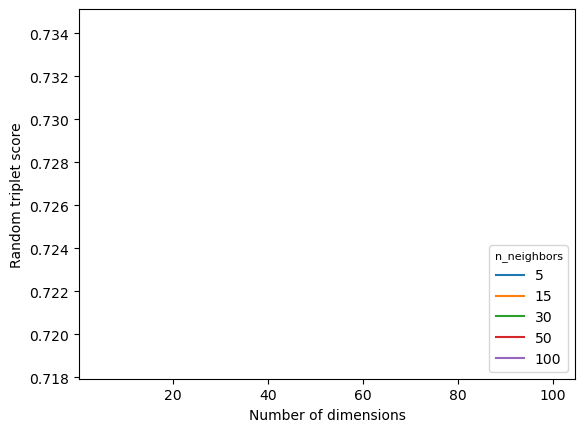

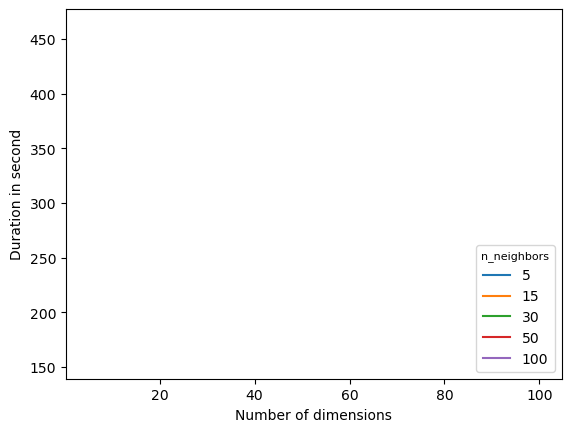

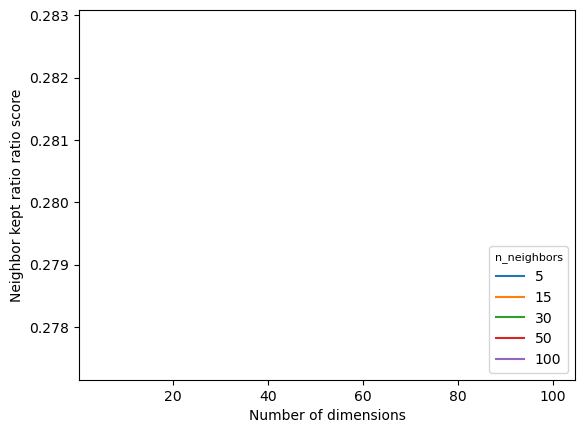

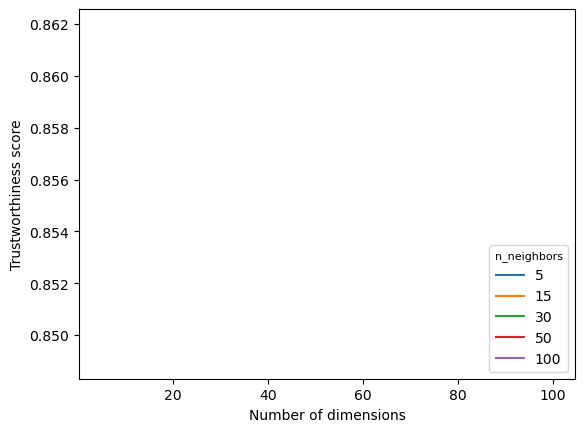

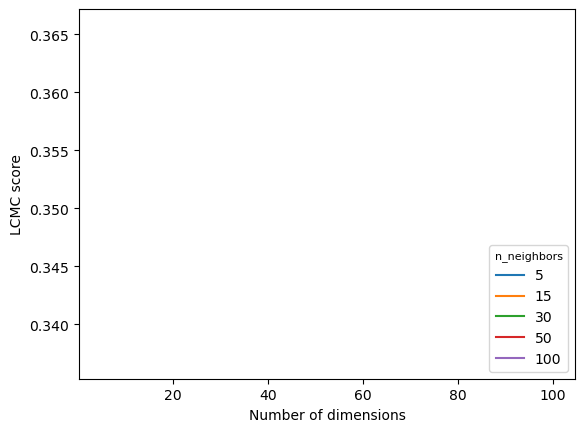

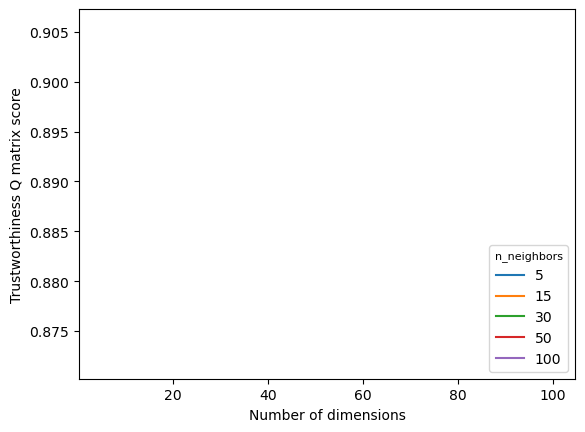

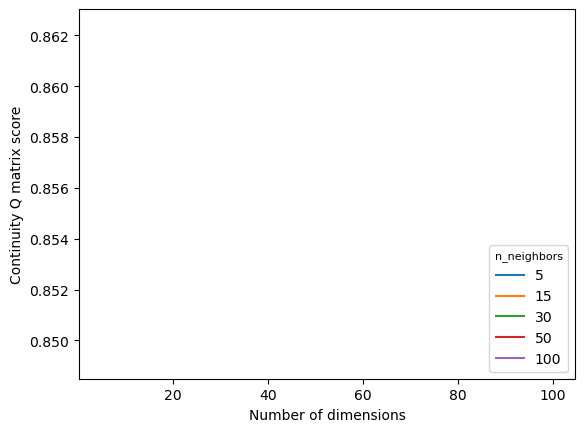

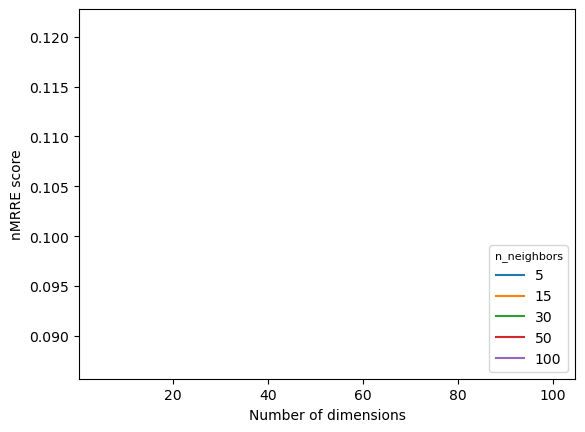

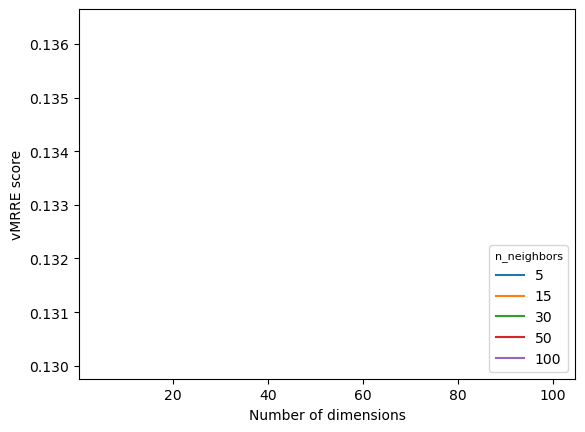

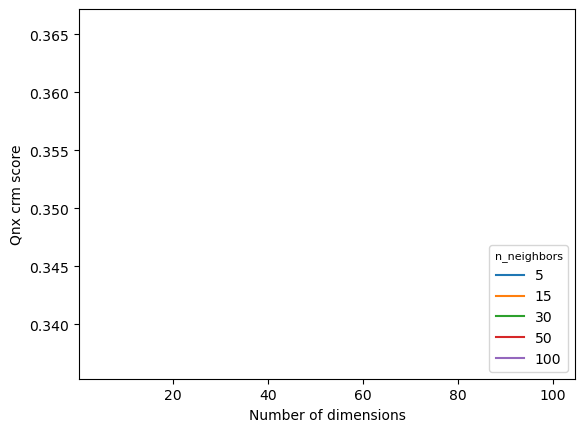

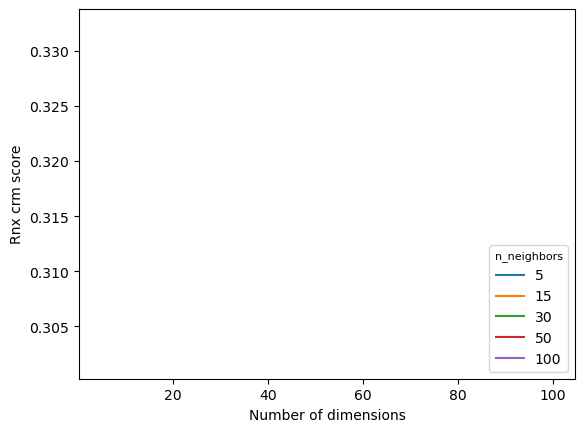

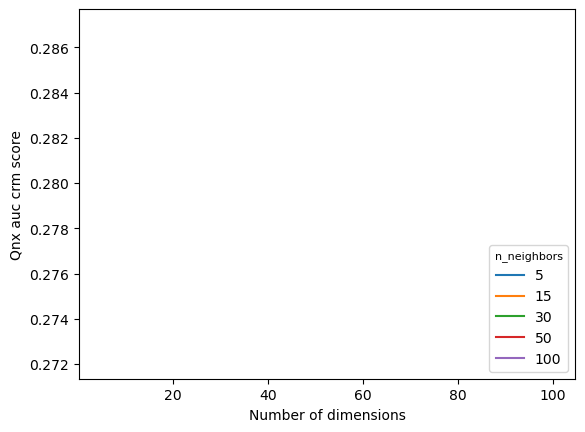

In [32]:
umap_n_n_data= pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_std_scale_mh.csv")

performance_plot_same_file(umap_n_n_data,x="n_neighbors",y="Random_triplets", hue="n_neighbors",x_title="Number of dimensions",y_title="Random triplet score",legend_title="n_neighbors")
performance_plot_same_file(umap_n_n_data,x="n_neighbors",y="duration_in_second", hue="n_neighbors",x_title="Number of dimensions",y_title="Duration in second",legend_title="n_neighbors")
performance_plot_same_file(umap_n_n_data,x="n_neighbors",y="neighbor_kept_50", hue="n_neighbors",x_title="Number of dimensions",y_title="Neighbor kept ratio ratio score",legend_title="n_neighbors")
performance_plot_same_file(umap_n_n_data,x="n_neighbors",y="Trustworthiness", hue="n_neighbors",x_title="Number of dimensions",y_title="Trustworthiness score",legend_title="n_neighbors")
performance_plot_same_file(umap_n_n_data,x="n_neighbors",y="LCMC_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="LCMC score",legend_title="n_neighbors")
performance_plot_same_file(umap_n_n_data,x="n_neighbors",y="Trustworthiness_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Trustworthiness Q matrix score",legend_title="n_neighbors")
performance_plot_same_file(umap_n_n_data,x="n_neighbors",y="Continuit_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Continuity Q matrix score",legend_title="n_neighbors")
performance_plot_same_file(umap_n_n_data,x="n_neighbors",y="nMRRE_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="nMRRE score",legend_title="n_neighbors")
performance_plot_same_file(umap_n_n_data,x="n_neighbors",y="vMRRE_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="vMRRE score",legend_title="n_neighbors")
performance_plot_same_file(umap_n_n_data,x="n_neighbors",y="Qnx_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Qnx crm score",legend_title="n_neighbors")
performance_plot_same_file(umap_n_n_data,x="n_neighbors",y="Rnx_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Rnx crm score",legend_title="n_neighbors")
performance_plot_same_file(umap_n_n_data,x="n_neighbors",y="Qnx_auc_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Qnx auc crm score",legend_title="n_neighbors")


## UMAP component tuning and comparing different scalers

In [2]:
#standard scaler
from sklearn.preprocessing import StandardScaler

param_grid = {'n_components': [2,4,6,8,10,20,30],
              'n_neighbors': [15,50]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_n_c_std_scale_mh.csv",
                        sample_size=default_sample_size,metric_chuck_size=metric_chuck_size,scaler=StandardScaler(), num_iter=10, dtype=np.float32,
                        n_parjobs=10, **umap_extra_args)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_n_c_std_scale_mh.csv")

Total number of embedding runs :  14 (combos)x10(iterations) with [40000] sample_size for the embedding. Exceptions will be raised, if sample size is larger than data size which is 3093792


14it [16:06:04, 4140.30s/it]                          

Hyperpameter tuning is done and the best scores with 40000 sample size are
Random_triplets              0.74408
dcor_1                      0.841849
neighbor_kept_50            0.319424
neighbor_kept               0.220327
dcor_2                      0.687944
Trustworthiness             0.887864
LCMC_Q_matrix               0.411764
Trustworthiness_Q_matrix    0.915773
Continuit_Q_matrix          0.886139
nMRRE_Q_matrix               0.07495
vMRRE_Q_matrix              0.095424
Qnx_crm_Q_matrix            0.411764
Rnx_crm_Q_matrix            0.380739
Qnx_auc_crm_Q_matrix        0.336358
Name: 0, dtype: object
with parameter: {'n_components': 10, 'n_neighbors': 15, 'metric': 'manhattan', 'output_metric': 'manhattan', 'n_jobs': 4, 'n_epochs': 500, 'init': 'spectral', 'dens_lambda': 0.1, 'dens_frac': 0.1, 'repulsion_strength': 1.1, 'negative_sample_rate': 10, 'min_dist': 0.0}
Finish tuning in  966.07 minutes.


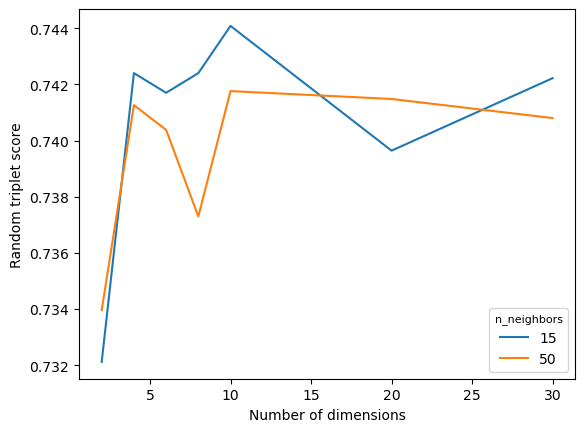

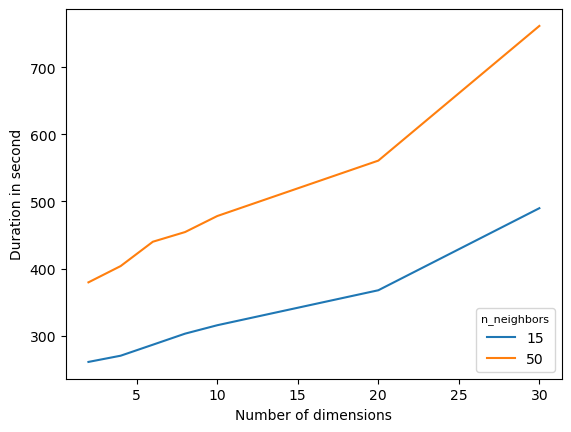

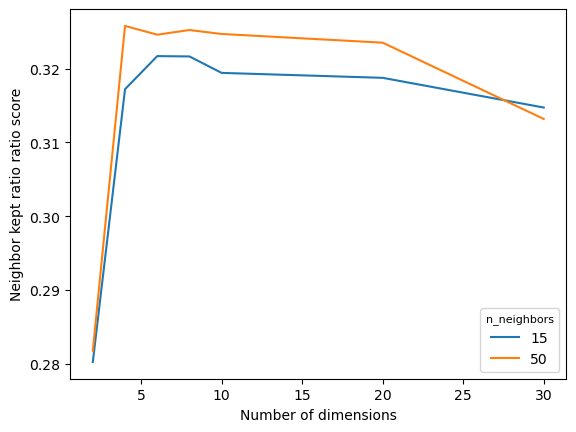

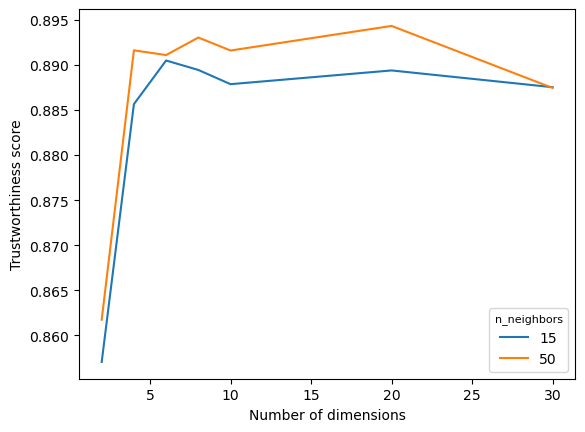

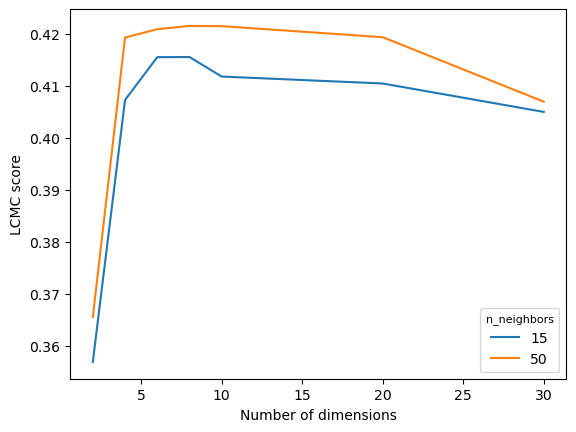

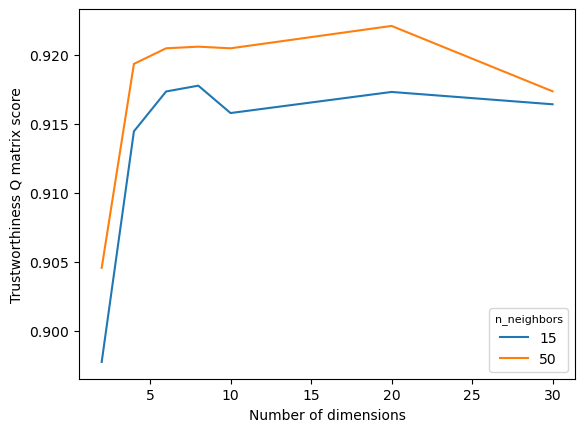

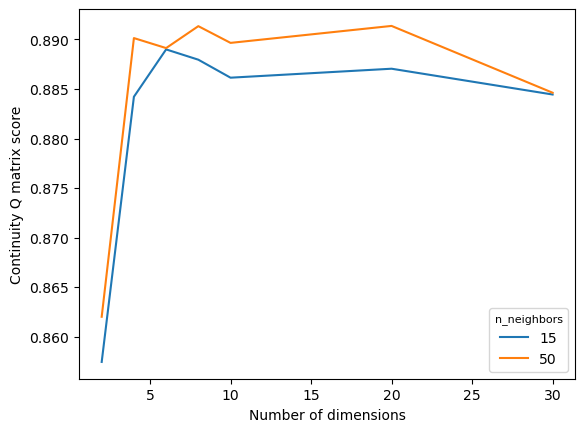

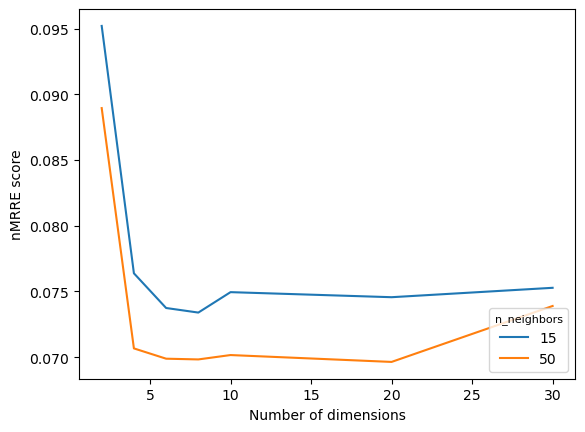

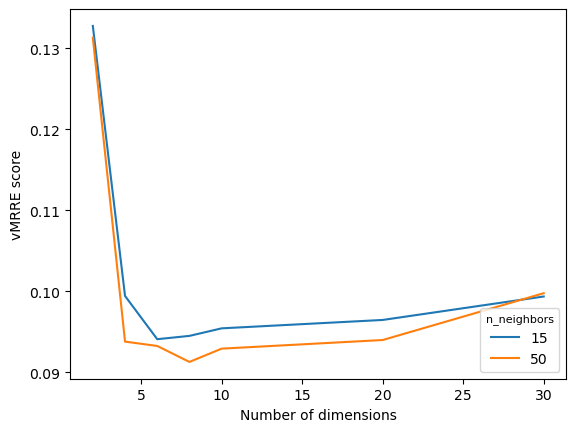

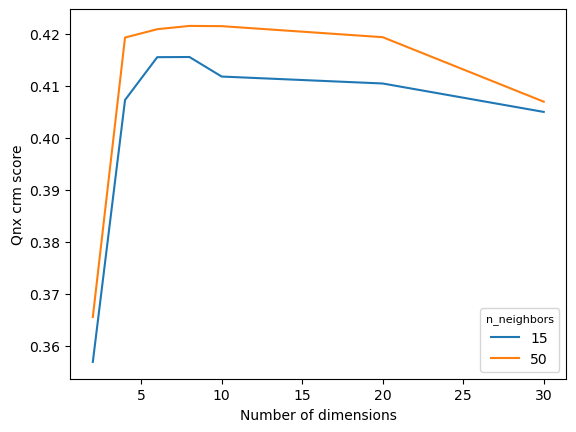

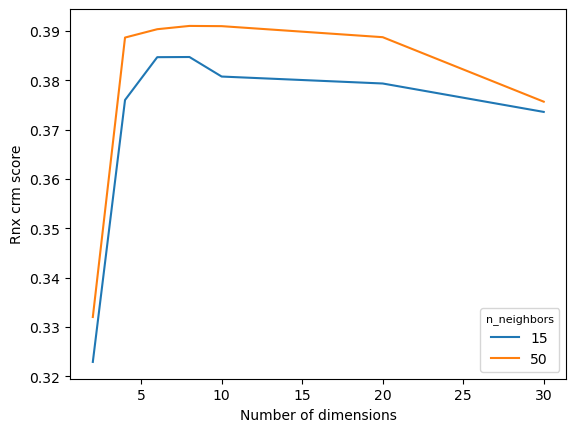

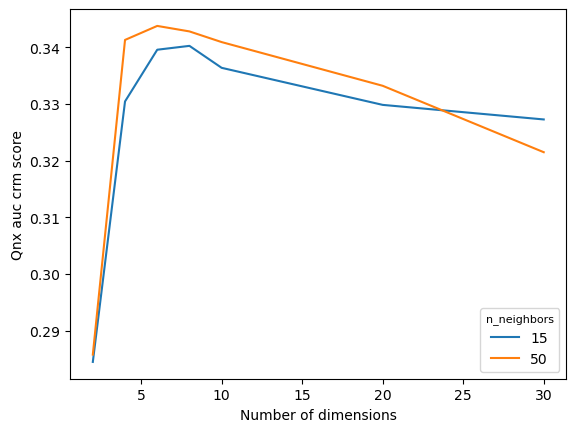

In [33]:
umap_std_data= pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_n_c_std_scale_mh.csv")

performance_plot_same_file(umap_std_data,x="n_components",y="Random_triplets", hue="n_neighbors",x_title="Number of dimensions",y_title="Random triplet score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="duration_in_second", hue="n_neighbors",x_title="Number of dimensions",y_title="Duration in second",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="neighbor_kept_50", hue="n_neighbors",x_title="Number of dimensions",y_title="Neighbor kept ratio ratio score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="Trustworthiness", hue="n_neighbors",x_title="Number of dimensions",y_title="Trustworthiness score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="LCMC_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="LCMC score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="Trustworthiness_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Trustworthiness Q matrix score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="Continuit_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Continuity Q matrix score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="nMRRE_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="nMRRE score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="vMRRE_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="vMRRE score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="Qnx_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Qnx crm score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="Rnx_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Rnx crm score",legend_title="n_neighbors")
performance_plot_same_file(umap_std_data,x="n_components",y="Qnx_auc_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Qnx auc crm score",legend_title="n_neighbors")


In [3]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution = 'normal')
param_grid = {'n_components': [2,4,6,8,10,20,30],
              'n_neighbors': [15,50]}
tuning = hyperparameter_tuning.Hyperparameter_tuning(cell_dyn,umap.UMAP,evaluators=evaluators,param_grid=param_grid,
                        ascending=ascending, file_name="models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_n_c_quan_scale_mh.csv",
                        sample_size=default_sample_size,metric_chuck_size=metric_chuck_size,scaler=scaler, num_iter=10, dtype=np.float32,
                        n_parjobs=10,**umap_extra_args)
results = tuning.grid_search()
tuning.results.to_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_n_c_quan_scale_mh.csv")

Total number of embedding runs :  14 (combos)x10(iterations) with [40000] sample_size for the embedding. Exceptions will be raised, if sample size is larger than data size which is 3093792


14it [15:58:10, 4106.47s/it]                          

Hyperpameter tuning is done and the best scores with 40000 sample size are
Random_triplets              0.73288
dcor_1                      0.840482
neighbor_kept_50            0.296404
neighbor_kept               0.193893
dcor_2                      0.658474
Trustworthiness             0.868184
LCMC_Q_matrix               0.378322
Trustworthiness_Q_matrix    0.909741
Continuit_Q_matrix          0.870666
nMRRE_Q_matrix               0.08339
vMRRE_Q_matrix              0.112978
Qnx_crm_Q_matrix            0.378322
Rnx_crm_Q_matrix            0.345533
Qnx_auc_crm_Q_matrix        0.301853
Name: 0, dtype: object
with parameter: {'n_components': 30, 'n_neighbors': 50, 'metric': 'manhattan', 'output_metric': 'manhattan', 'n_jobs': 4, 'n_epochs': 500, 'init': 'spectral', 'dens_lambda': 0.1, 'dens_frac': 0.1, 'repulsion_strength': 1.1, 'negative_sample_rate': 10, 'min_dist': 0.0}
Finish tuning in  958.18 minutes.


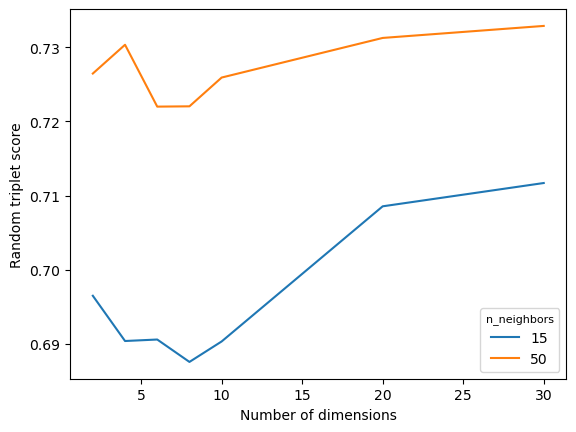

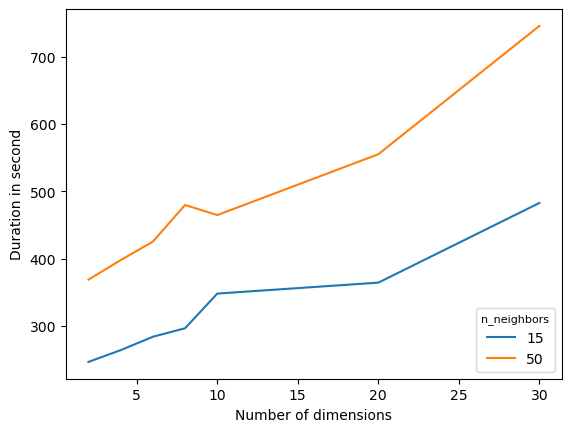

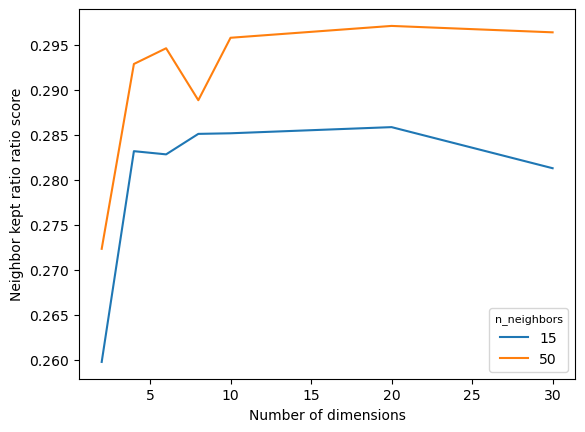

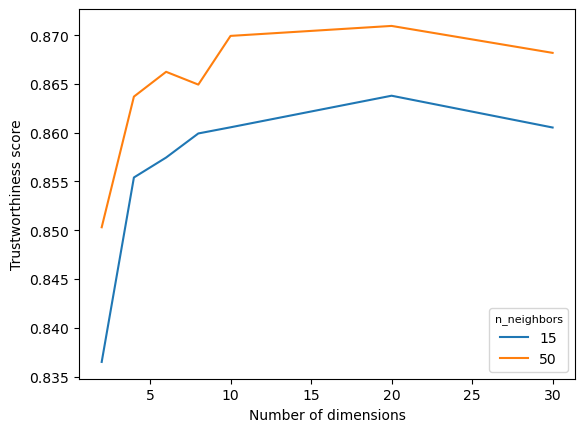

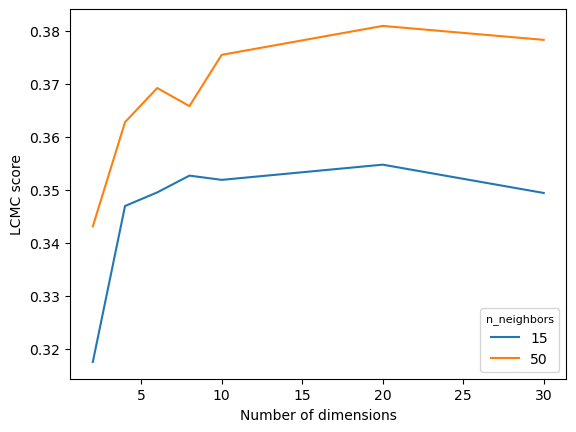

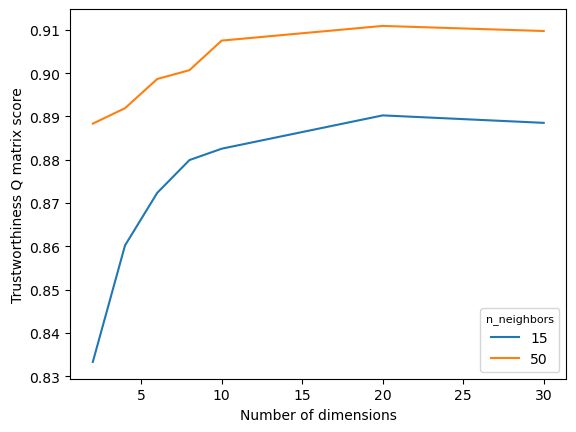

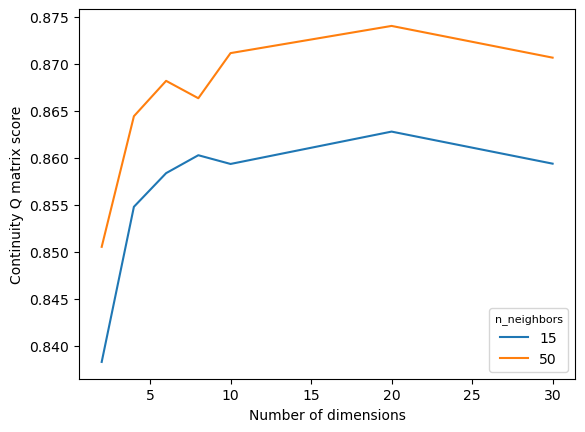

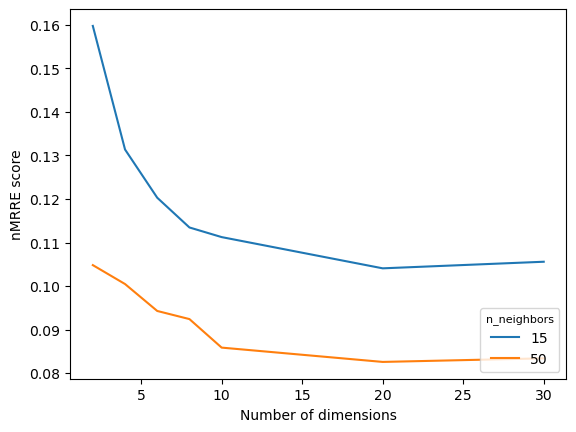

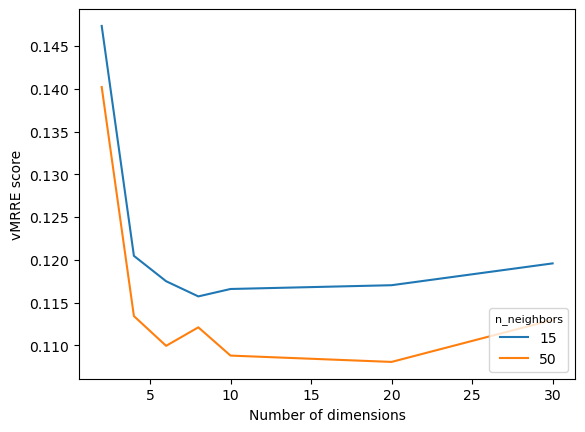

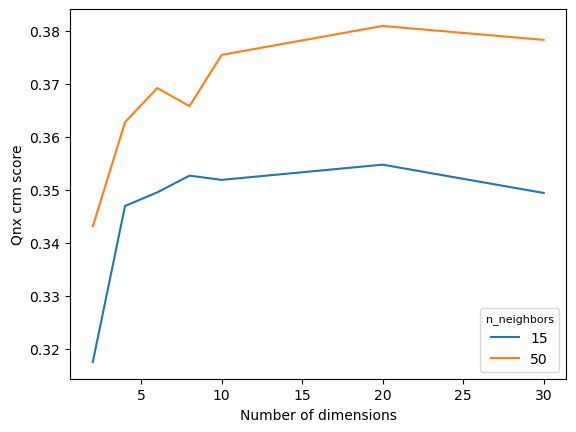

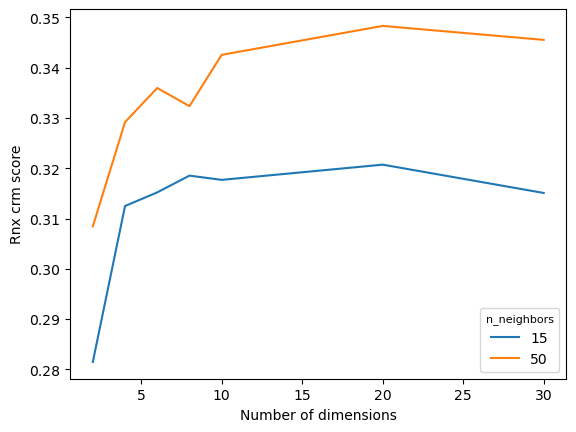

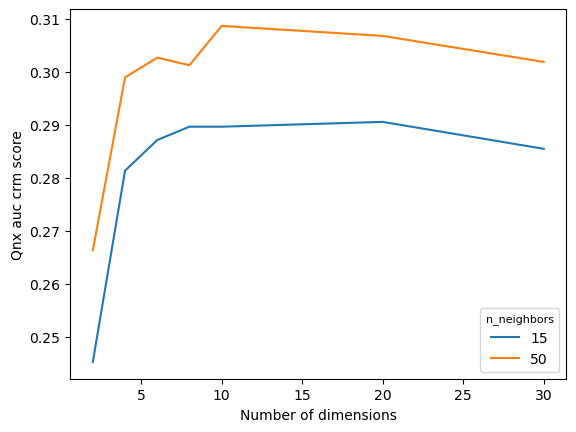

In [10]:
umap_quan_data= pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_40000_n_n_n_c_quan_scale_mh.csv")

performance_plot_same_file(umap_quan_data,x="n_components",y="Random_triplets", hue="n_neighbors",x_title="Number of dimensions",y_title="Random triplet score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="duration_in_second", hue="n_neighbors",x_title="Number of dimensions",y_title="Duration in second",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="neighbor_kept_50", hue="n_neighbors",x_title="Number of dimensions",y_title="Neighbor kept ratio ratio score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="Trustworthiness", hue="n_neighbors",x_title="Number of dimensions",y_title="Trustworthiness score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="LCMC_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="LCMC score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="Trustworthiness_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Trustworthiness Q matrix score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="Continuit_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Continuity Q matrix score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="nMRRE_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="nMRRE score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="vMRRE_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="vMRRE score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="Qnx_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Qnx crm score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="Rnx_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Rnx crm score",legend_title="n_neighbors")
performance_plot_same_file(umap_quan_data,x="n_components",y="Qnx_auc_crm_Q_matrix", hue="n_neighbors",x_title="Number of dimensions",y_title="Qnx auc crm score",legend_title="n_neighbors")


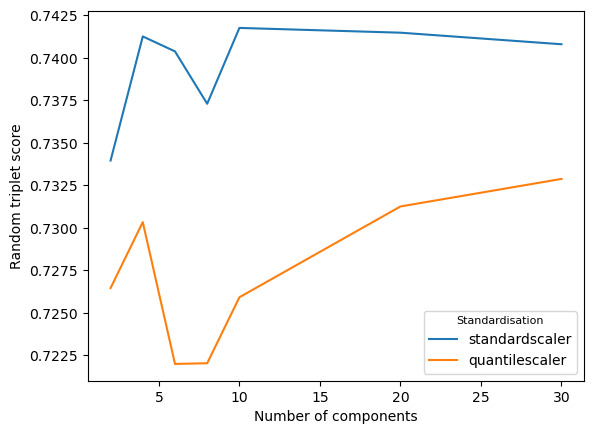

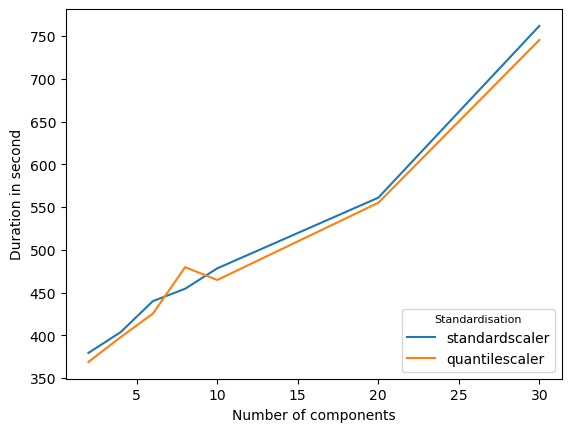

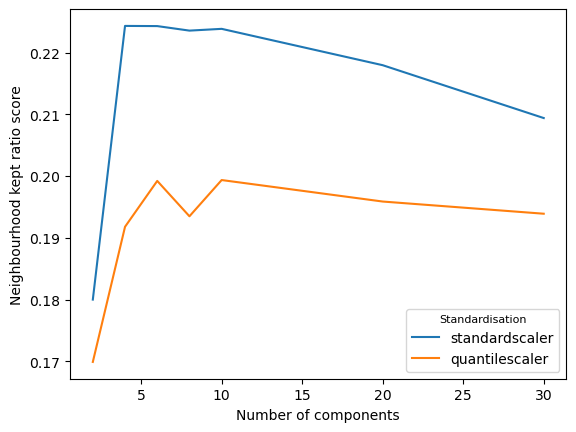

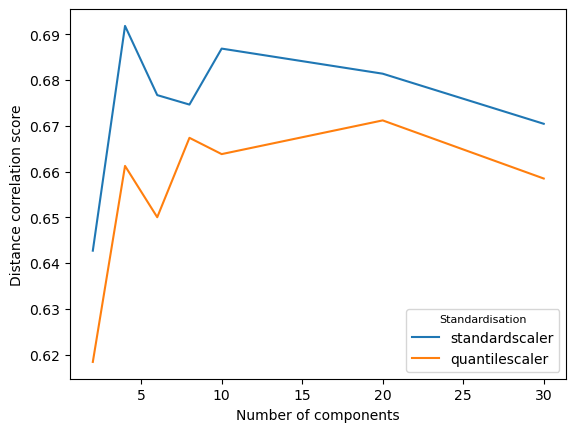

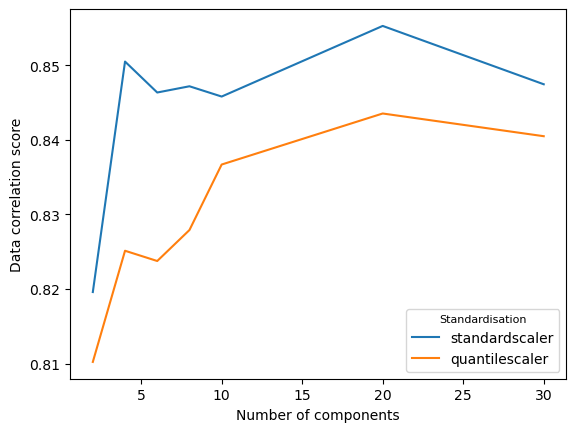

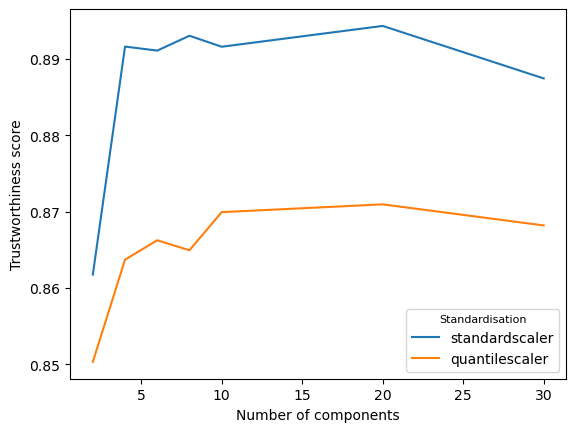

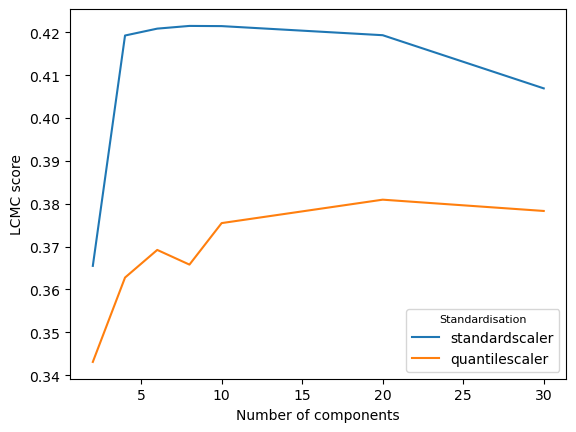

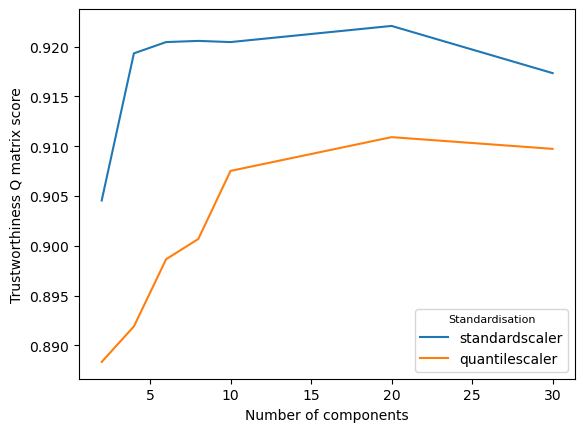

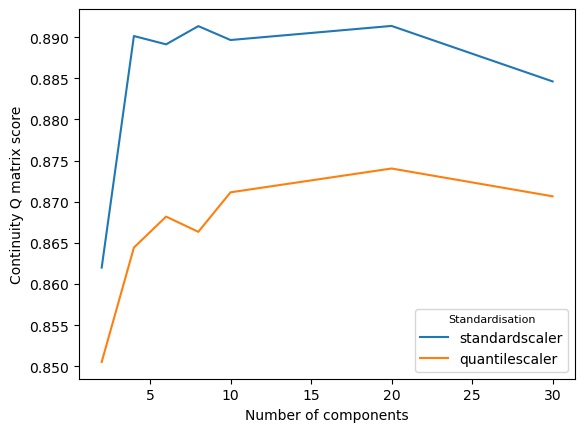

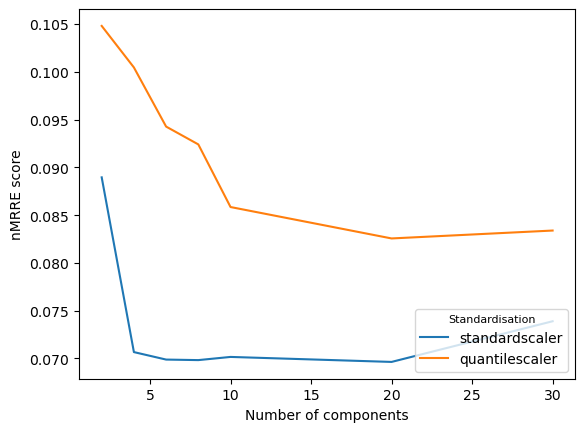

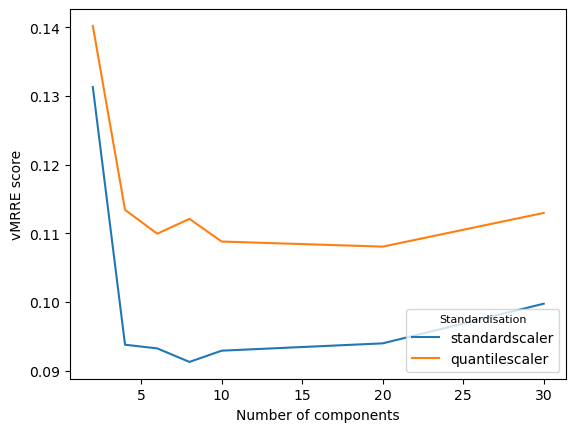

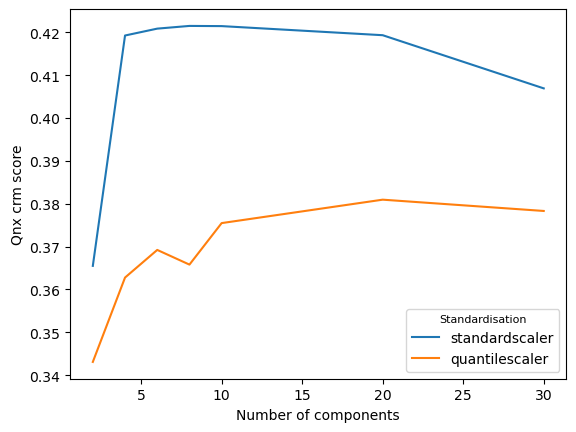

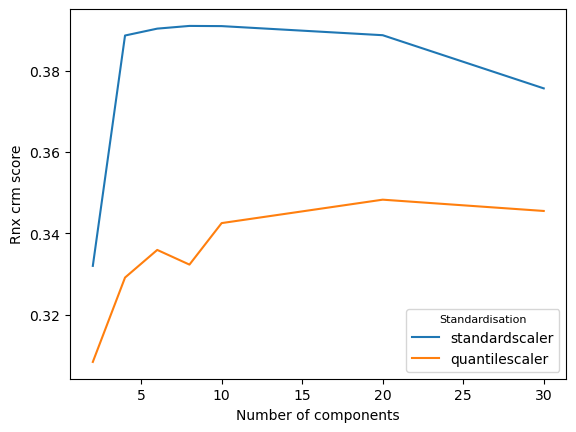

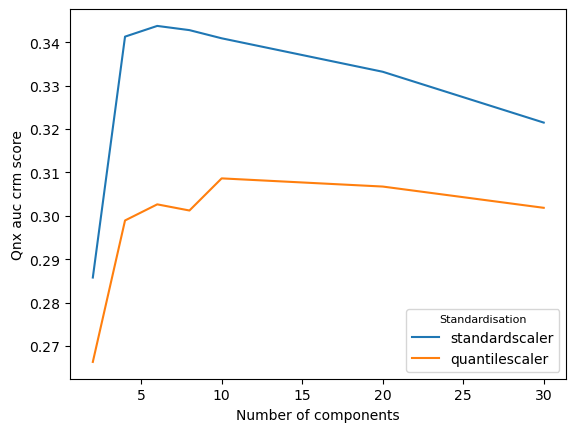

In [12]:
embedder_list = [ umap_std_data[umap_std_data["n_neighbors"]==50],umap_quan_data[umap_quan_data["n_neighbors"]==50]]
hue = ['standardscaler','quantilescaler']
performance_plot_different_files(embedder_list,'n_components','Random_triplets', 'Number of components',"Random triplet score",hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','duration_in_second', 'Number of components','Duration in second',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','neighbor_kept', 'Number of components','Neighbourhood kept ratio score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','dcor_2', 'Number of components','Distance correlation score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','dcor_1', 'Number of components','Data correlation score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','Trustworthiness', 'Number of components','Trustworthiness score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','LCMC_Q_matrix', 'Number of components','LCMC score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','Trustworthiness_Q_matrix', 'Number of components','Trustworthiness Q matrix score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','Continuit_Q_matrix', 'Number of components','Continuity Q matrix score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','nMRRE_Q_matrix', 'Number of components','nMRRE score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','vMRRE_Q_matrix', 'Number of components','vMRRE score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','Qnx_crm_Q_matrix', 'Number of components','Qnx crm score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','Rnx_crm_Q_matrix', 'Number of components','Rnx crm score',hue, "Standardisation")
performance_plot_different_files(embedder_list,'n_components','Qnx_auc_crm_Q_matrix', 'Number of components','Qnx auc crm score',hue, "Standardisation")


## Putting it together with 6 components and 50 n_neighbors

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
embedder_full = umap.UMAP(n_components=6,n_neighbors=50,metric = 'manhattan', output_metric= 'manhattan',
                        n_jobs=4, n_epochs=500, init = 'spectral',dens_lambda=0.1, dens_frac=0.1, 
                        repulsion_strength=1.1, negative_sample_rate=10, random_state=42, min_dist=0.0)


le_pipe = Pipeline([('scaler', StandardScaler()),
                    ('embedder', embedder_full)])

le_pipe.fit(cell_dyn.to_numpy(dtype = np.float32))
embedded = pd.DataFrame(le_pipe.named_steps['embedder'].embedding_, columns = ["dim_1","dim_2","dim_3","dim_4","dim_5","dim_6"])
embedded['sex'] = cell_dyn_with_labels.gender
embedded['age'] = cell_dyn_with_labels.age
embedded['study_id'] = cell_dyn_with_labels.studyid_alle_celldyn
embedded['analysis_dt'] = cell_dyn_with_labels.asp_dt
embedded['sample_dt'] = cell_dyn_with_labels.afname_dt
embedded['draw_hour'] = cell_dyn_with_labels.draw_hour
embedded.to_feather("L:/lab_research/RES-Folder-UPOD/Celldynclustering/E_ResearchData/2_ResearchData/cell_dyn_UMAP_embedded_dim_6_50_n_n_MF100.feather")

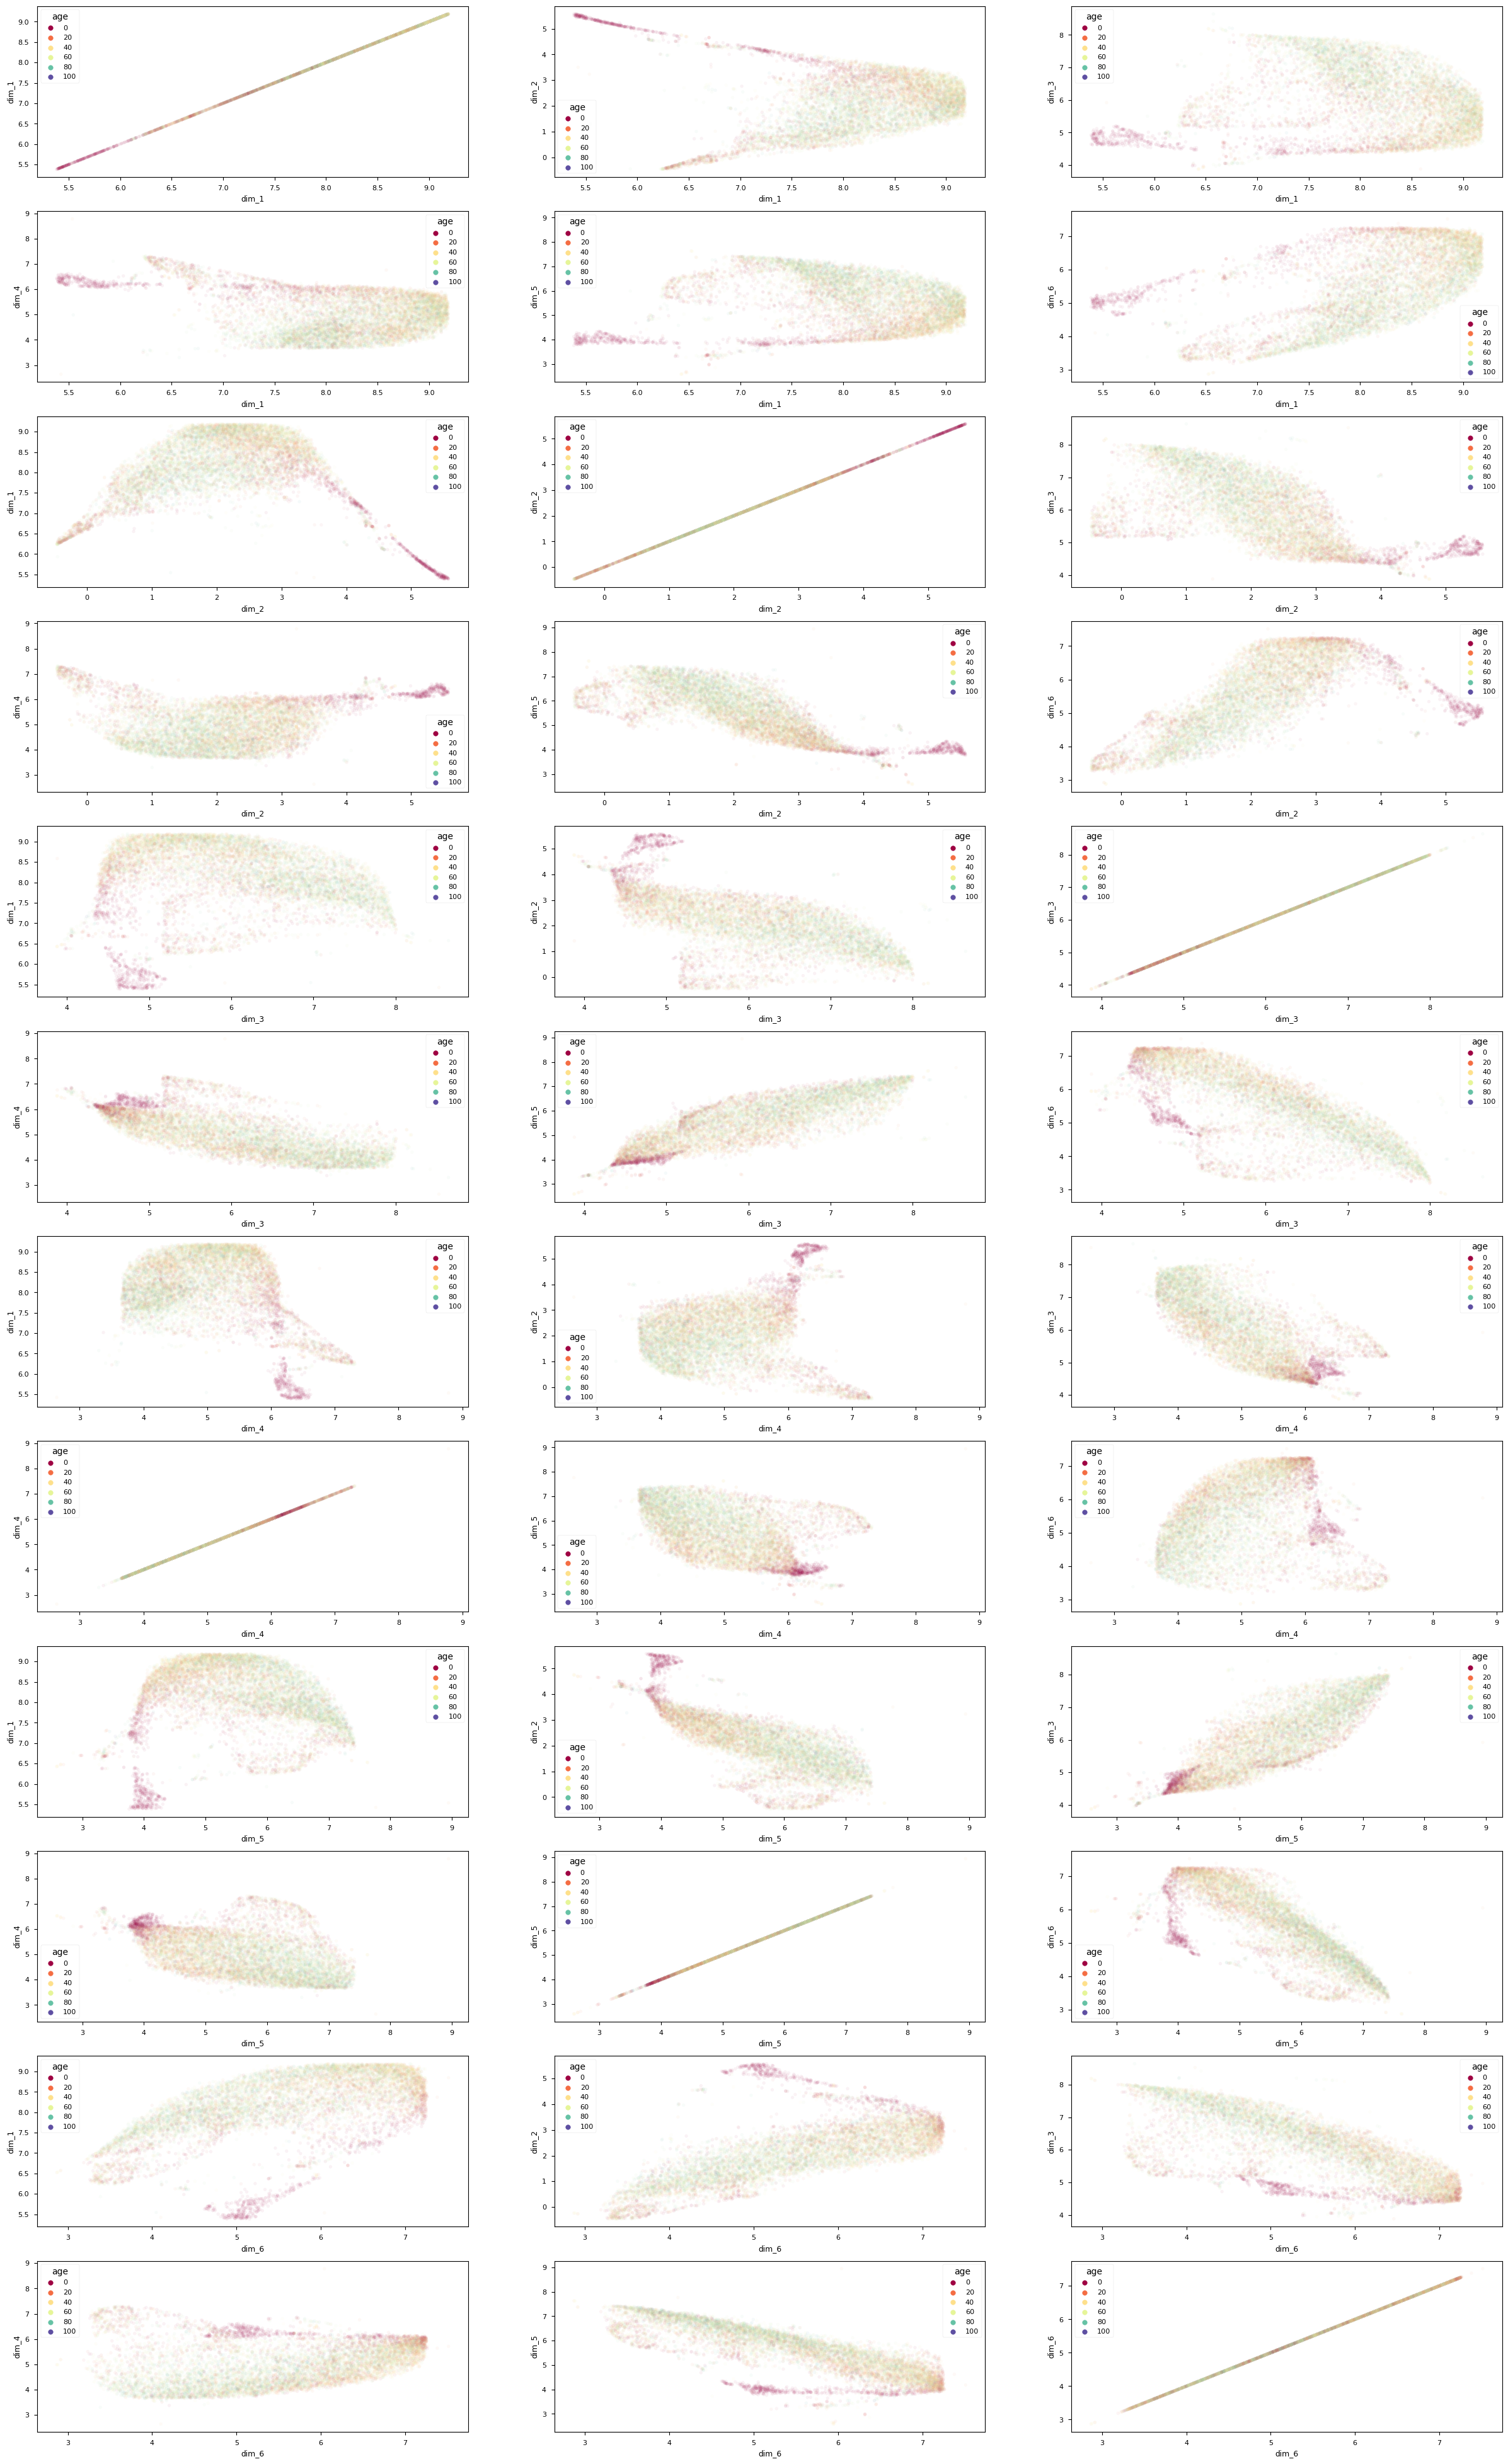

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
if True:
    plt.style.use("seaborn-paper")

    d1q01 = embedded.dim_1.quantile(0.01)
    d1q99 = embedded.dim_1.quantile(0.99)
    d2q01 = embedded.dim_2.quantile(0.01)
    d2q99 = embedded.dim_2.quantile(0.99)

    conds = (embedded.dim_1>d1q01) & (embedded.dim_1<d1q99) & (embedded.dim_2>d2q01) & (embedded.dim_2<d2q99)

    plot_df = embedded.loc[conds].sample(min([10000, sum(conds)]))

    fig, ax = plt.subplots(12,3,figsize = (30,50))
    i,j = 0,0

    #sns.scatterplot(data=plot_df, x='dim_1', y='dim_2',  hue='age', palette="Spectral", s=15, alpha=0.6).set_title("Plotting 1st dimension with the 2nd dimension and looking at pattern of age")
                            #s = 15, alpha = 0.05, palette="Spectral")
    sns.color_palette("vlag", as_cmap=True) # icefire, Spectral
    for colx in plot_df[[c for c in embedded if 'dim' in c]]:
        for coly in plot_df[[c for c in embedded if 'dim' in c]]:
            sns.scatterplot(data=plot_df, x=colx, y=coly,  hue='age',
                            s = 15, alpha = 0.05, ax=ax[i,j], palette="Spectral")
            i = i+1 if j == 2 else i
            j = j+1 if j < 2 else 0
    plt.show()
    #fig.suptitle(model_str)
    #plt.savefig("T:\laupodteam\AIOS\Chontira\CellDynClustering\presentations\images\\age_embedding.png", dpi=300)  

In [8]:
def performance_plot_different_files(score_ls,x,y, x_title ,y_title, legend_values, legend_title ):
    for sample in score_ls:
        sns.lineplot(data=sample,x=sample[x], y=sample[y])
    
    plt.legend(legend_values, title = legend_title, title_fontsize=8, loc= 'lower right')
    plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".png",dpi = 300, bbox_imches = ' tight')
    plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".eps",dpi = 300, bbox_imches = ' tight')
    plt.xlabel(x_title, fontsize=10)
    plt.ylabel(y_title, fontsize=10)
    plt.show()

C:\Users\cchumsae\AppData\Local\Temp\ipykernel_17636\3472907876.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_imches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".png",dpi = 300, bbox_imches = ' tight')
C:\Users\cchumsae\AppData\Local\Temp\ipykernel_17636\3472907876.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_imches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".eps",dpi = 300, bbox_imches = ' tight')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


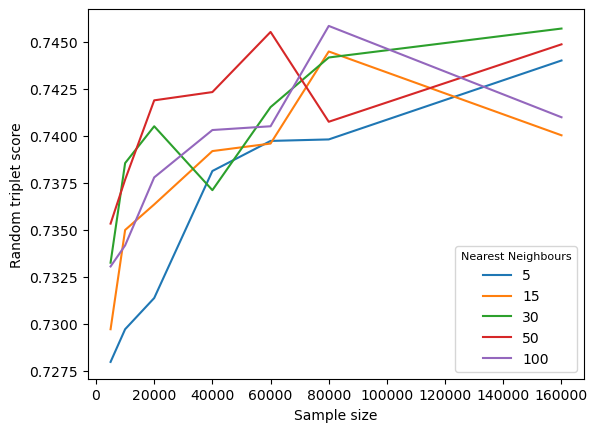

C:\Users\cchumsae\AppData\Local\Temp\ipykernel_17636\3472907876.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_imches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".png",dpi = 300, bbox_imches = ' tight')
C:\Users\cchumsae\AppData\Local\Temp\ipykernel_17636\3472907876.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_imches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".eps",dpi = 300, bbox_imches = ' tight')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


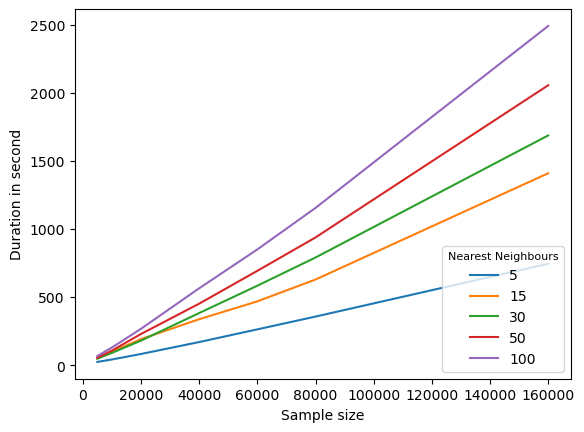

C:\Users\cchumsae\AppData\Local\Temp\ipykernel_17636\3472907876.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_imches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".png",dpi = 300, bbox_imches = ' tight')
C:\Users\cchumsae\AppData\Local\Temp\ipykernel_17636\3472907876.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_imches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".eps",dpi = 300, bbox_imches = ' tight')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


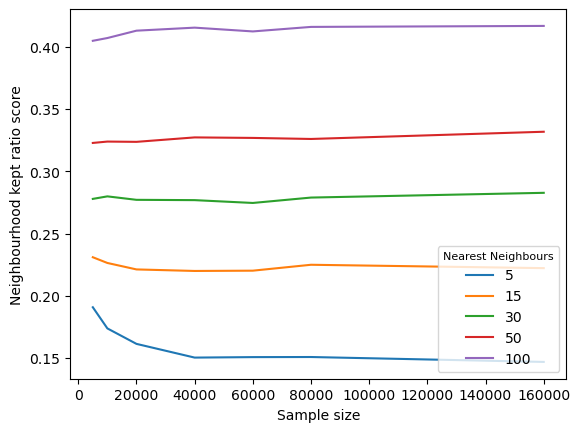

C:\Users\cchumsae\AppData\Local\Temp\ipykernel_17636\3472907876.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_imches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".png",dpi = 300, bbox_imches = ' tight')
C:\Users\cchumsae\AppData\Local\Temp\ipykernel_17636\3472907876.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_imches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".eps",dpi = 300, bbox_imches = ' tight')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


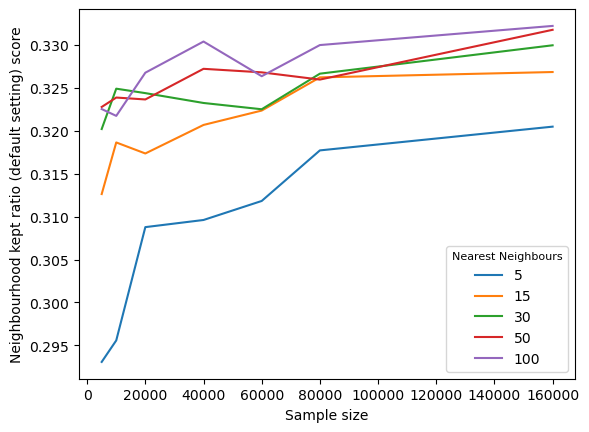

C:\Users\cchumsae\AppData\Local\Temp\ipykernel_17636\3472907876.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_imches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".png",dpi = 300, bbox_imches = ' tight')
C:\Users\cchumsae\AppData\Local\Temp\ipykernel_17636\3472907876.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_imches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".eps",dpi = 300, bbox_imches = ' tight')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


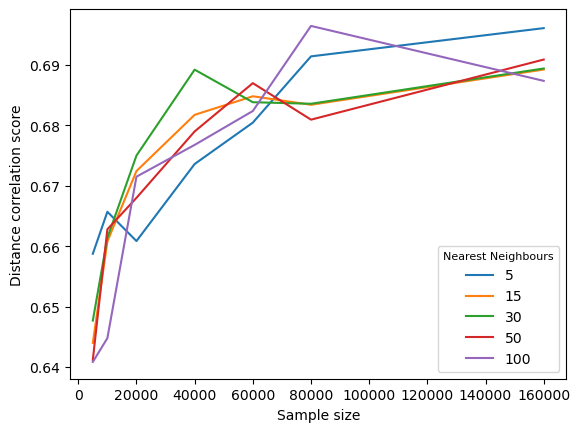

C:\Users\cchumsae\AppData\Local\Temp\ipykernel_17636\3472907876.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_imches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".png",dpi = 300, bbox_imches = ' tight')
C:\Users\cchumsae\AppData\Local\Temp\ipykernel_17636\3472907876.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_imches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".eps",dpi = 300, bbox_imches = ' tight')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


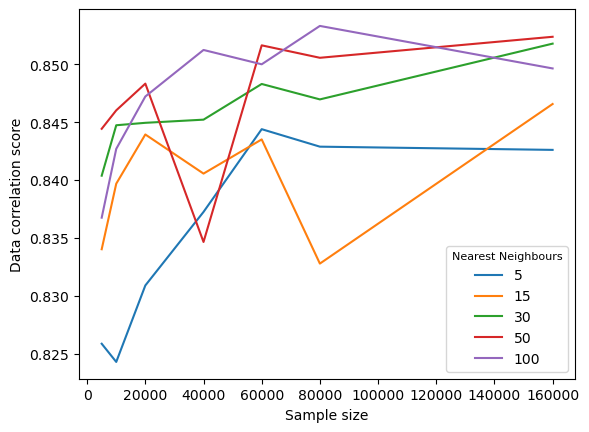

C:\Users\cchumsae\AppData\Local\Temp\ipykernel_17636\3472907876.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_imches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".png",dpi = 300, bbox_imches = ' tight')
C:\Users\cchumsae\AppData\Local\Temp\ipykernel_17636\3472907876.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_imches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("T:/laupodteam/AIOS/Chontira/celldyn_embedder/artifacts/UMAP_varying_neighbours" + y + ".eps",dpi = 300, bbox_imches = ' tight')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


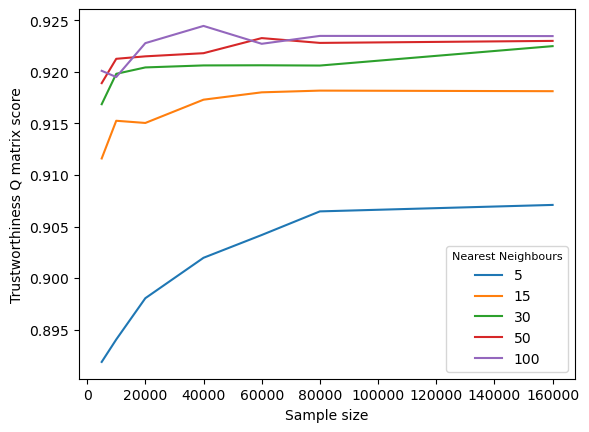

In [9]:
sample_n_n_5 = pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_5_std_Q_mh.csv")
sample_n_n_15 = pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_15_std_Q_mh.csv")
sample_n_n_30 = pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_size_large_n_n_30_std_Q_mh.csv")
sample_n_n_50 = pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_size_large_n_n_50_std_Q_mh.csv")
sample_n_n_100 = pd.read_csv("models/embedding/UMAP/cell_dyn_UMAP_tune_MF100_sizes_large_n_n_100_std_Q_mh.csv")

sample_ls = [sample_n_n_5,sample_n_n_15, sample_n_n_30, sample_n_n_50,sample_n_n_100]
performance_plot_different_files(sample_ls,'sample_size','Random_triplets', 'Sample size',"Random triplet score",[5,15,30,50,100], "Nearest Neighbours")
performance_plot_different_files(sample_ls,'sample_size','duration_in_second', 'Sample size','Duration in second',[5,15,30,50,100], "Nearest Neighbours")
performance_plot_different_files(sample_ls,'sample_size','neighbor_kept', 'Sample size','Neighbourhood kept ratio score',[5,15,30,50,100], "Nearest Neighbours")
performance_plot_different_files(sample_ls,'sample_size','neighbor_kept_50', 'Sample size','Neighbourhood kept ratio (default setting) score',[5,15,30,50,100], "Nearest Neighbours")
performance_plot_different_files(sample_ls,'sample_size','dcor_2', 'Sample size','Distance correlation score',[5,15,30,50,100], "Nearest Neighbours")
performance_plot_different_files(sample_ls,'sample_size','dcor_1', 'Sample size','Data correlation score',[5,15,30,50,100], "Nearest Neighbours")
performance_plot_different_files(sample_ls,'sample_size','Trustworthiness_Q_matrix', 'Sample size','Trustworthiness Q matrix score',[5,15,30,50,100], "Nearest Neighbours")


In [15]:
def subsampling_return_indexes(X, subsampling):
    rand = np.random.default_rng()
    n_data = len(X) 
    subsampling = min(n_data, subsampling) 
    return  rand.choice(np.arange(n_data), size=subsampling, replace=False)

In [19]:
sample_index = cell_dyn.sample(40000).index
umap_model = umap.UMAP(n_components=6,n_neighbors=50,metric = 'manhattan', output_metric= 'manhattan',
                        n_jobs=4, n_epochs=500, init = 'spectral',dens_lambda=0.1, dens_frac=0.1, 
                        repulsion_strength=1.1, negative_sample_rate=10, random_state=42, min_dist=0.0)
sub_cell = cell_dyn.loc[sample_index].to_numpy(dtype = np.float32)

scaled = StandardScaler().fit_transform(sub_cell)
embedded = umap_model.fit_transform(scaled)


embedded_df = pd.DataFrame(embedded, columns = ["dim_1","dim_2","dim_3","dim_4","dim_5","dim_6"])
embedded_df['sex'] = cell_dyn_with_labels.gender[sample_index].values
embedded_df['age'] = cell_dyn_with_labels.age[sample_index].values
embedded_df['study_id'] = cell_dyn_with_labels.studyid_alle_celldyn[sample_index].values
embedded_df['analysis_dt'] = cell_dyn_with_labels.asp_dt[sample_index].values
embedded_df['sample_dt'] = cell_dyn_with_labels.afname_dt[sample_index].values
embedded_df['draw_hour'] = cell_dyn_with_labels.draw_hour[sample_index].values
embedded_df['cell_dyn_index'] = sample_index
embedded_df.to_feather("L:/lab_research/RES-Folder-UPOD/Celldynclustering/E_ResearchData/2_ResearchData/cell_dyn_UMAP_embedded_dim_6_MF100_40000_samples.feather")

In [21]:
embedded_df = pd.read_feather("L:/lab_research/RES-Folder-UPOD/Celldynclustering/E_ResearchData/2_ResearchData/cell_dyn_UMAP_embedded_dim_6_MF100_40000_samples.feather")


In [28]:
embedded = np.asarray(embedded_df.iloc[:,0:6], dtype=np.float32)
sub_cell = np.asarray(cell_dyn.loc[embedded_df['cell_dyn_index'].values], dtype=np.float32)

In [29]:
from scipy.spatial import distance
embedder = []
dists = []
eval_index = subsampling_return_indexes(sub_cell,500)
eval_or = sub_cell[eval_index]
eval_emb = embedded[eval_index]
dist_or = distance.pdist(X=eval_or, metric="cityblock")
dist_emb = distance.pdist(X=eval_emb, metric="cityblock")
dists.append({'d_or': dist_or, 'd_emb': dist_emb})


Text(0.5, 0.98, 'Embedder UMAP')

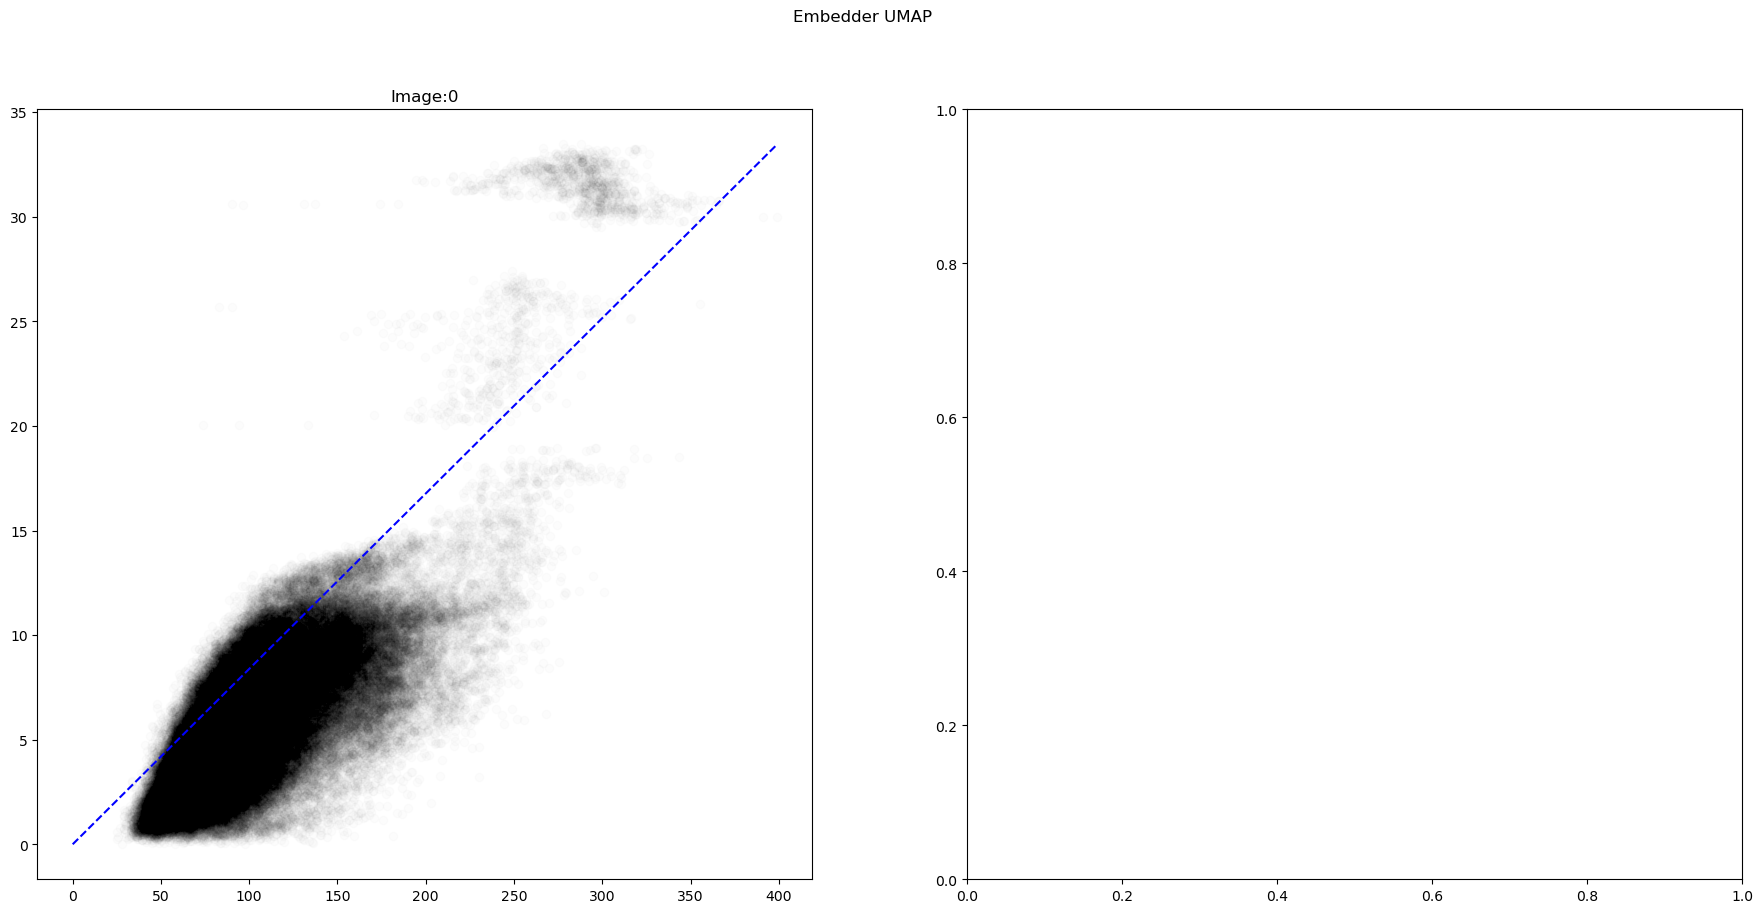

In [30]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(22,10))
for k, ds in enumerate(dists):
    j=k%2
    ax[j].scatter(x=ds['d_or'], y=ds['d_emb'], color='black', alpha=0.01)
    mx,my = max(ds['d_or']), max(ds['d_emb'])
    ax[j].plot([0,mx], [0, my], ls='--', c='blue')
    ax[j].set_title(f'Image:{k}')
plt.suptitle(f'Embedder UMAP')